In [1]:
import cv2

In [2]:
wall = cv2.imread("Wall.jpg", 0)

cv2.imshow("Wall",wall)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Edge using Sobel

In [3]:
import numpy as np

sobelx_wall = cv2.Sobel(wall, cv2.CV_64F, 1, 0, ksize=9)
sobely_wall = cv2.Sobel(wall, cv2.CV_64F, 0, 1, ksize=9)

abssobelx = cv2.convertScaleAbs(sobelx_wall)
abssobely = cv2.convertScaleAbs(sobely_wall)

final_org = cv2.resize(wall, (960, 540))
final_x = cv2.resize(sobelx_wall, (960, 540))
final_y = cv2.resize(sobely_wall, (960, 540))

final_wall = cv2.addWeighted(sobelx_wall, 0.5, sobely_wall, 0.5, 0);
# final_wall = cv2.addWeighted(abssobelx, 0.5, abssobely, 0.5, 0);

# final_wall_1 = cv2.Sobel(wall, cv2.CV_64F, 1, 1, ksize=9)
gradient_magnitude = np.sqrt(np.square(sobelx_wall) + np.square(sobely_wall))
 
gradient_magnitude *= 255.0 / gradient_magnitude.max()
 


# final = np.hstack((wall, sobelx, sobely))

# final_b = cv2.resize(final, (960, 540))

cv2.imshow("Original", final_org)
cv2.imshow("Sobel_x", sobelx_wall)
cv2.imshow("Sobel_y", sobely_wall)
cv2.imshow("Sobel", final_wall)
cv2.imshow("gradient", gradient_magnitude)
# cv2.imshow("Sobel1", final_wall_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
unique, counts = np.unique(final_wall, return_counts=True)

print(unique, counts)

[-565651. -558586. -549135. ...  549899.  568094.  587858.] [1 1 1 ... 1 1 1]


(Text(0.5, 1.0, 'sobely'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

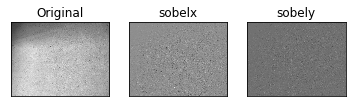

In [6]:
from matplotlib import pyplot as plt

plt.subplot(1,3,1),plt.imshow(wall, 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx_wall,cmap='gray')
plt.title('sobelx'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobely_wall,cmap='gray')
plt.title('sobely'), plt.xticks([]), plt.yticks([])

In [7]:
grad = cv2.addWeighted(sobelx_wall, 0.5, sobely_wall, 0.5, 0);

cv2.imshow("edge", grad)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
tree = cv2.imread("Tree.jpg", 0)

sobelx_tree = cv2.Sobel(tree, cv2.CV_64F, 1, 0, ksize=9)
sobely_tree = cv2.Sobel(tree, cv2.CV_64F, 0, 1, ksize=9)

final_org = cv2.resize(tree, (960, 540))
final_x = cv2.resize(sobelx_tree, (960, 540))
final_y = cv2.resize(sobely_tree, (960, 540))

final_tree = cv2.addWeighted(sobelx_tree, 0.5, sobely_tree, 0.5, 0)

cv2.imshow("Original", final_org)
cv2.imshow("Sobel_x", final_x)
cv2.imshow("Sobel_y", final_y)
cv2.imshow("Sobel", final_tree)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Applying Gaussinan filter for wall

In [9]:
wall_gau1 = cv2.GaussianBlur(wall, (7,7), 0)

sobelx = cv2.Sobel(wall_gau1, cv2.CV_64F, 1, 0, ksize=9)
sobely = cv2.Sobel(wall_gau1, cv2.CV_64F, 0, 1, ksize=9)

# final_org = cv2.resize(wall_gau1, (960, 540))
final_x = cv2.resize(sobelx, (960, 540))
final_y = cv2.resize(sobely, (960, 540))

final = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

# cv2.imshow("Original", wall)
# cv2.imshow("Gaussian wall", wall_gau1)
cv2.imshow("Sobel_x_org", sobelx_wall)
cv2.imshow("Sobel_y_org", sobely_wall)
cv2.imshow("Sobel_org", final_wall)
cv2.imshow("Sobel_x", sobelx)
cv2.imshow("Sobel_y", sobely)
cv2.imshow("Sobel", final)
cv2.waitKey(0)
cv2.destroyAllWindows()

(Text(0.5, 1.0, 'Sobel'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

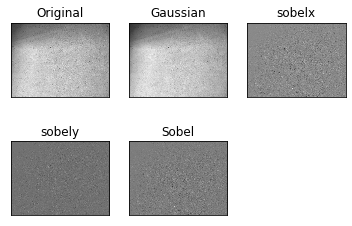

In [10]:
from matplotlib import pyplot as plt

plt.subplot(2,3,1),plt.imshow(wall, 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(wall_gau1, 'gray')
plt.title('Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3),plt.imshow(sobelx,cmap='gray')
plt.title('sobelx'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,4),plt.imshow(sobely,cmap='gray')
plt.title('sobely'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,5),plt.imshow(final, 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

In [11]:
wall_gau2 = cv2.GaussianBlur(wall, (9,9), 0)

sobelx = cv2.Sobel(wall_gau2, cv2.CV_64F, 1, 0, ksize=9)
sobely = cv2.Sobel(wall_gau2, cv2.CV_64F, 0, 1, ksize=9)

# final_org = cv2.resize(wall_gau1, (960, 540))
final_x = cv2.resize(sobelx, (960, 540))
final_y = cv2.resize(sobely, (960, 540))

final = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

# cv2.imshow("Original", wall)
# cv2.imshow("Gaussian wall", wall_gau2)
cv2.imshow("Sobel_x_org", sobelx_wall)
cv2.imshow("Sobel_y_org", sobely_wall)
cv2.imshow("Sobel_org", final_wall)
cv2.imshow("Sobel_x", sobelx)
cv2.imshow("Sobel_y", sobely)
cv2.imshow("Sobel", final)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
wall_gau3 = cv2.GaussianBlur(wall, (11,11), 0)

sobelx = cv2.Sobel(wall_gau3, cv2.CV_64F, 1, 0, ksize=9)
sobely = cv2.Sobel(wall_gau3, cv2.CV_64F, 0, 1, ksize=9)

# final_org = cv2.resize(wall_gau1, (960, 540))
final_x = cv2.resize(sobelx, (960, 540))
final_y = cv2.resize(sobely, (960, 540))

final = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

# cv2.imshow("Original", wall)
# cv2.imshow("Gaussian wall", wall_gau3)
cv2.imshow("Sobel_x_org", sobelx_wall)
cv2.imshow("Sobel_y_org", sobely_wall)
cv2.imshow("Sobel_org", final_wall)
cv2.imshow("Sobel_x", sobelx)
cv2.imshow("Sobel_y", sobely)
cv2.imshow("Sobel", final)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Gaussian filter for tree

In [13]:
tree_gau1 = cv2.GaussianBlur(tree, (7,7), 0)

sobelx = cv2.Sobel(tree_gau1, cv2.CV_64F, 1, 0, ksize=9)
sobely = cv2.Sobel(tree_gau1, cv2.CV_64F, 0, 1, ksize=9)

final_org = cv2.resize(tree, (960, 540))
final_gau1 = cv2.resize(tree_gau1, (960, 540))
final_x = cv2.resize(sobelx, (960, 540))
final_y = cv2.resize(sobely, (960, 540))

final = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

# cv2.imshow("Original", final_org)
# cv2.imshow("Gaussian tree", final_gau1)
cv2.imshow("Sobel_x_org", sobelx_tree)
cv2.imshow("Sobel_y_org", sobely_tree)
cv2.imshow("Sobel_org", final_tree)
cv2.imshow("Sobel_x", sobelx)
cv2.imshow("Sobel_y", sobely)
cv2.imshow("Sobel", final)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
tree_gau2 = cv2.GaussianBlur(tree, (9,9), 0)

sobelx = cv2.Sobel(tree_gau2, cv2.CV_64F, 1, 0, ksize=9)
sobely = cv2.Sobel(tree_gau2, cv2.CV_64F, 0, 1, ksize=9)

final_org = cv2.resize(tree, (960, 540))
final_gau1 = cv2.resize(tree_gau2, (960, 540))
final_x = cv2.resize(sobelx, (960, 540))
final_y = cv2.resize(sobely, (960, 540))

final = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

# cv2.imshow("Original", final_org)
# cv2.imshow("Gaussian tree", final_gau2)
cv2.imshow("Sobel_x_org", sobelx_tree)
cv2.imshow("Sobel_y_org", sobely_tree)
cv2.imshow("Sobel_org", final_tree)
cv2.imshow("Sobel_x", sobelx)
cv2.imshow("Sobel_y", sobely)
cv2.imshow("Sobel", final)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
tree_gau3 = cv2.GaussianBlur(tree, (11,11), 0)

sobelx = cv2.Sobel(tree_gau3, cv2.CV_64F, 1, 0, ksize=9)
sobely = cv2.Sobel(tree_gau3, cv2.CV_64F, 0, 1, ksize=9)

final_org = cv2.resize(tree, (960, 540))
final_gau1 = cv2.resize(tree_gau3, (960, 540))
final_x = cv2.resize(sobelx, (960, 540))
final_y = cv2.resize(sobely, (960, 540))

final = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

# cv2.imshow("Original", final_org)
# cv2.imshow("Gaussian tree", final_gau3)
cv2.imshow("Sobel_x_org", sobelx_tree)
cv2.imshow("Sobel_y_org", sobely_tree)
cv2.imshow("Sobel_org", final_tree)
cv2.imshow("Sobel_x", sobelx)
cv2.imshow("Sobel_y", sobely)
cv2.imshow("Sobel", final)
cv2.waitKey(0)
cv2.destroyAllWindows()

As we increase the gaussian filter size we will get a more smoother image which results in getting less number of edges in edge map than in  original sobel image